<div style="font-family: 'Times New Roman', Times, serif; font-size: 30px; font-weight: bold;">
  PROJECT PENGOLAHAN CITRA DIGITAL
</div>
Analisis Infeksi Malaria Berdasarkan Perbedaan Tekstur Citra Sek Darah Menggunakan Segmentasi Thresholding

================================= PERCOBAAN 3 ===================================

In [2]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import ceil
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Dalam proyek ini, kode di atas merupakan berbagai library yang diimpor untuk menunjang proses pengolahan citra, ekstraksi fitur, dan klasifikasi menggunakan machine learning. Library os digunakan untuk mengelola file dan folder, seperti membaca nama-nama file gambar yang akan diproses menggunakan fungsi seperti `os.listdir()` dan `os.path.join()`. Untuk pengolahan citra digital, digunakan `cv2` (diimpor sebagai `cv`) yang menyediakan fungsi-fungsi seperti `cv.imread()`, `cv.cvtColor()`, dan `cv.resize()` untuk membaca, mengubah warna, dan mengubah ukuran gambar. Visualisasi hasil seperti tampilan gambar atau grafik dilakukan menggunakan `matplotlib.pyplot` melalui fungsi `plt.imshow()`, `plt.title()`, dan `plt.show()`.

Library numpy (`np`) digunakan untuk operasi numerik seperti membuat array (`np.array()`), menghitung rata-rata (`np.mean()`), atau matriks korelasi. Fungsi `ceil()` dari math digunakan untuk membulatkan angka ke atas, sedangkan Counter dari collections digunakan untuk menghitung frekuensi label menggunakan `Counter()`.

Untuk pengelolaan data tabular, digunakan pandas (`pd`) yang memudahkan manipulasi data menggunakan struktur DataFrame, dengan fungsi seperti `pd.DataFrame()` dan `df.to_csv()`. Normalisasi fitur dilakukan dengan StandardScaler dari `sklearn`.preprocessing menggunakan fungsi `fit_transform()`, yang penting agar setiap fitur memiliki skala yang seragam. Untuk mengurangi dimensi data dan menghindari redundansi, digunakan PCA dari sklearn.decomposition dengan fungsi seperti `PCA()`.`fit_transform()`. Dataset kemudian dibagi menggunakan `train_test_split()` dari `sklearn.model_selection` menjadi data latih dan data uji.

Evaluasi performa model dilakukan menggunakan beberapa metrik dari `sklearn.metrics`, seperti `accuracy_score()`, `classification_report()`, `confusion_matrix()`, dan visualisasi dengan `ConfusionMatrixDisplay`. `from_predictions()`. Untuk ekstraksi fitur tekstur, digunakan metode GLCM (Gray-Level Co-occurrence Matrix) dari skimage.feature melalui fungsi `graycomatrix()` untuk membuat matriks ko-occurrence dan `graycoprops()` untuk menghitung properti tekstur seperti contrast, homogeneity, dan ASM. Selain itu, nilai entropi dihitung dari histogram citra menggunakan fungsi `entropy()` dari scipy.stats.

Terakhir, klasifikasi dilakukan menggunakan beberapa algoritma dari scikit-learn, yaitu RandomForestClassifier dari sklearn.ensemble dengan fungsi seperti `fit()` dan `predict()`, SVC (Support Vector Classifier) dari `sklearn.svm`, serta `KNeighborsClassifier` dari sklearn.neighbors. Ketiga model ini dilatih menggunakan data hasil ekstraksi fitur dan diuji untuk melihat akurasinya dalam membedakan kelas citra.

# DATA LOADING

In [3]:
data = []
labels = []
file_name = []
for label_folder in ['Parasitized', 'Uninfected']:
    folder_path = os.path.join('dataset\\', label_folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv.imread(img_path)
        img = cv.resize(img, (100, 100))  # Resize ke ukuran tetap
        data.append(img)
        labels.append(label_folder)
        file_name.append(filename)

Kode di atas digunakan untuk membaca dan memproses gambar dari dua folder berbeda, yaitu `'Parasitized'` dan `'Uninfected'`, yang masing-masing merepresentasikan label dalam klasifikasi citra (misalnya gambar sel darah yang terinfeksi malaria dan yang sehat). Pertama, dua list yaitu `data` dan `labels` disiapkan untuk menyimpan citra dan labelnya, serta `file_name` untuk menyimpan nama file gambar. Dengan menggunakan perulangan `for`, kode menelusuri setiap folder label menggunakan `os.path.join()` untuk membentuk path lengkap ke folder, lalu mengambil semua nama file gambar dalam folder tersebut menggunakan `os.listdir()`. Setiap gambar kemudian dibaca menggunakan `cv.imread()` dan diubah ukurannya menjadi `100x100` piksel menggunakan `cv.resize()` agar memiliki ukuran seragam. Gambar hasil resize disimpan dalam list `data`, label (berdasarkan nama folder) disimpan dalam `labels`, dan nama file disimpan dalam `file_name`. Proses ini membentuk dataset yang siap digunakan.

Kode ini digunakan untuk menampilkan distribusi jumlah gambar berdasarkan kelas serta menampilkan contoh gambar dari masing-masing kelas dalam dataset. Pertama, `Counter(labels)` digunakan untuk menghitung jumlah gambar untuk setiap label (kelas), kemudian nama kelas `(classes)` dan jumlahnya `(counts)` diekstrak. Data ini divisualisasikan menggunakan `plt.bar()` dalam bentuk diagram batang, dengan judul, label sumbu, dan garis bantu (grid) pada sumbu-y untuk memperjelas tampilan. Setelah itu, program mencetak label "Output: Contoh Sample Data:" dan menampilkan satu contoh gambar dari setiap kelas. Ini dilakukan dengan menelusuri seluruh data, mengecek label, dan hanya menampilkan satu gambar per kelas menggunakan `plt.subplot()` dan `plt.imshow()` untuk menampilkan gambar. Gambar ditampilkan dalam satu baris menggunakan `plt.figure(figsize=(15, 3))`, dan loop dihentikan setelah semua kelas ditampilkan. Fungsi `plt.tight_layout()` digunakan untuk merapikan tata letak agar subplot tidak saling tumpang tindih.

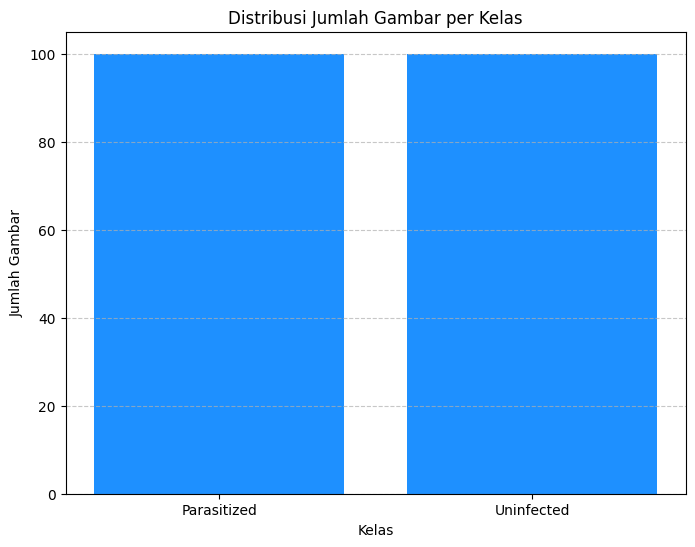

Output: Contoh Sample Data:


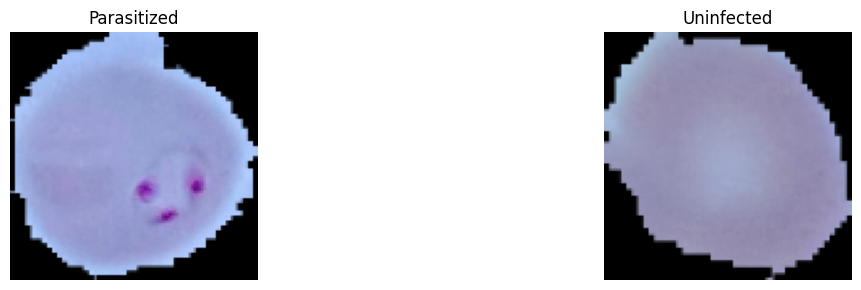

In [5]:
label_counts = Counter(labels)
classes = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='dodgerblue')
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Output: Contoh Sample Data:")

plt.figure(figsize=(15, 3))
shown_labels = set()
shown = 0

for i in range(len(data)):
    label = labels[i]
    if label in shown_labels:
        continue
    plt.subplot(1, len(classes), shown + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')
    shown_labels.add(label)
    shown += 1
    if shown >= len(classes):
        break

plt.tight_layout()
plt.show()

# PREPROCESSING

## Support

In [6]:
def sorting(arr): #di sort ini harus jd 1 array
    for i in range(len(arr)):
        swap = i + np.argmin(arr[i:])
        (arr[i], arr[swap]) = (arr[swap], arr[i])
    return arr
def flatArray(arr): #buat jadiin array 1 dimensi
    row, col = arr.shape
    flat=[]
    for i in range (row):
        for j in range (col):
            flat.append(arr[i][j]) #buat nambahin nilai ke list
    return flat
def fit(window,SE):
    for i in range(len(SE)):
      for j in range(len(SE)):
        if(SE[i][j]==1 and window[i][j]==0):
          return 0
    return 1
def getParasite(image):
    ret, parasit = cv.threshold(image, 118, 255, cv.THRESH_BINARY)
    parasit = 255 - parasit
    return parasit
SE = [[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]]

Kode ini berisi beberapa fungsi yang berperan dalam pemrosesan citra dan operasi matriks, terutama untuk pengolahan biner dan morfologi citra. Fungsi `sorting(arr)` berfungsi mengurutkan elemen dalam sebuah array satu dimensi menggunakan algoritma selection sort dengan bantuan `np.argmin` untuk mencari nilai terkecil dalam subarray yang belum diurutkan. Fungsi `flatArray(arr)` digunakan untuk mengubah array 2 dimensi menjadi array 1 dimensi dengan cara mengambil setiap elemen dari setiap baris dan kolom dan menambahkannya ke dalam list baru.

Fungsi `fit(window, SE)` digunakan untuk memeriksa apakah sebuah window (bagian kecil dari citra) cocok dengan struktur elemen (structuring element) `SE`. Fungsi ini mengecek setiap posisi dalam `SE` yang bernilai 1, dan jika pada posisi tersebut window bernilai 0, maka fungsi mengembalikan 0 yang berarti tidak cocok; jika tidak ditemukan ketidaksesuaian, fungsi mengembalikan 1 sebagai tanda kecocokan.

Fungsi `getParasite(image)` berfungsi untuk melakukan thresholding pada citra grayscale menggunakan nilai ambang 118, sehingga menghasilkan citra biner di mana piksel yang lebih terang dari 118 menjadi 255 (putih) dan sisanya 0 (hitam). Kemudian hasil threshold ini di-invers sehingga piksel putih dan hitam bertukar posisi. Ini biasanya digunakan untuk mengekstrak objek tertentu dari latar belakang, dalam konteks ini kemungkinan objek parasit.

Terakhir, `SE` adalah sebuah matriks 5x5 yang semua elemennya bernilai 1, berfungsi sebagai structuring element (elemen struktur) dalam operasi morfologi citra seperti dilasi atau erosi. Elemen ini digunakan dalam fungsi `fit` untuk memeriksa pola kecocokan dalam sebuah window citra.

## Preprocessing

In [7]:
def prepro1_resize(img, new_width=100, new_height=100):
    old_height, old_width = img.shape[:2]
    resized = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = int(i * old_height / new_height)
            y = int(j * old_width / new_width)
            resized[i, j] = img[x, y]
    return resized
def prepro2_grayscale(img):
    height, width = img.shape[:2]
    gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = img[i, j]
            gray[i, j] = int(0.2989 * r + 0.5870 * g + 0.1140 * b)  # Luminosity formula
    return gray
def prepro3_normalization(img):
    height, width = img.shape
    norm = np.zeros((height, width), dtype=np.float32)

    for i in range(height):
        for j in range(width):
            norm[i, j] = img[i, j] / 255.0
    return norm
def prepro4_thresholding(image, threshold):
    res = np.zeros_like(image, dtype=np.uint8)
    res[image > threshold] = 255
    return res
def prepro5_median(image,windowHeight,windowWidth):
    pad = np.pad(image,(windowHeight,windowWidth),mode='edge')
    median = np.zeros(image.shape, dtype=np.uint8)
    for i in range(windowHeight,len(pad)-windowHeight):
        for j in range(windowWidth,len(pad)-windowWidth):
            window = flatArray(pad[i-windowHeight:i,j-windowWidth:j])
            window = sorting(window)
            median[i-windowHeight,j-windowWidth] = window[ceil(len(window)/2)]
    return median
def erosi(image,SE):
    erosi = np.zeros(image.shape, dtype=np.uint8)
    row, col = image.shape
    # melakukan perulangan pada window center image
    for i in range(row-len(SE)):
        for j in range(col-len(SE)):
            window = image[i:i+len(SE),j:j+len(SE)]
            # mengambil nilai pada fungsi fit, jika fit maka bernilai 1 jika tidak maka 0
            erosi[i][j] = fit(window,SE)
    return erosi
def segmentation(mainImage, grayImage): #buat maskingnya
    parasite=getParasite(grayImage)
    erode = erosi(parasite, SE)
    medParasite = prepro5_median(erode, 4, 4)
    maskParasite = cv.bitwise_and(mainImage, mainImage, mask=medParasite) #buat maskingnya
    return maskParasite

Kode ini berisi beberapa fungsi preprocessing citra dan segmentasi yang dirancang untuk mengolah gambar, khususnya mendeteksi dan mengekstrak objek tertentu (dalam konteks ini, kemungkinan parasit) dari gambar utama. Berikut penjelasan tiap fungsi secara ringkas:

Fungsi `prepro1_resize` bertugas meresize gambar ke ukuran baru (default 100x100 piksel) dengan cara manual: untuk setiap piksel di gambar hasil, dipetakan ke piksel asal di gambar asli sesuai proporsi, lalu diisi dengan nilai piksel tersebut. Ini mirip dengan teknik nearest neighbor.

Fungsi `prepro2_grayscale` mengubah gambar berwarna (RGB) menjadi grayscale menggunakan rumus luminosity, yaitu kombinasi tertimbang dari nilai merah (R), hijau (G), dan biru (B) untuk mencerminkan persepsi terang mata manusia.

Fungsi `prepro3_normalization` melakukan normalisasi piksel gambar grayscale dengan membagi setiap nilai piksel dengan 255, sehingga hasilnya berupa angka antara 0 dan 1. Ini biasanya digunakan agar data citra konsisten dan lebih mudah diproses oleh algoritma selanjutnya.

Fungsi `prepro4_thresholding` melakukan segmentasi sederhana dengan threshold: setiap piksel yang nilainya lebih besar dari ambang (threshold) akan diubah menjadi 255 (putih), sementara sisanya tetap 0 (hitam). Ini menghasilkan citra biner.

Fungsi `prepro5_median` menerapkan filter median secara manual untuk menghilangkan noise pada gambar biner. Fungsi ini menggunakan padding untuk menghindari batas citra, kemudian mengambil jendela (window) piksel di sekitar tiap posisi, mengubahnya menjadi array satu dimensi, mengurutkannya, dan memilih nilai tengah sebagai nilai piksel hasil. Filter median efektif menghilangkan noise tanpa merusak tepi objek.

Fungsi `erosi` melakukan operasi erosi morfologi menggunakan structuring element (SE). Ia memindai seluruh gambar dengan jendela berukuran SE, kemudian memanggil fungsi `fit` untuk memeriksa apakah jendela cocok dengan SE (artinya SE "muat" sepenuhnya di area yang sama pada gambar). Jika cocok, piksel hasil bernilai 1 (putih), jika tidak 0 (hitam). Erosi berguna untuk menghilangkan piksel-piksel kecil di tepi objek.

Fungsi `segmentation` melakukan segmentasi objek parasit pada gambar. Pertama, ia memanggil `getParasite` untuk melakukan thresholding dan inversi agar parasit menjadi objek putih di latar belakang hitam. Lalu, hasil ini di-erosi untuk memperhalus objek, kemudian difilter median untuk menghilangkan noise. Akhirnya, fungsi ini melakukan masking pada gambar asli dengan hasil segmentasi sebagai masker, sehingga hanya bagian parasit yang terlihat.

Rangkaian fungsi ini memproses gambar dari resize, konversi ke grayscale, thresholding, denoising, hingga segmentasi objek yang diinginkan dengan teknik morfologi dan filtering. Ini adalah tahapan penting sebelum ekstraksi fitur atau analisis lebih lanjut.


In [8]:
# dataPreprocessed = []

# for i in range(len(data)):
#     img = data[i]

#     # === Tahapan Preprocessing Manual ===
#     img_resized = prepro1_resize(img)                      # Resize ke 100x100
#     img_grayscale = prepro2_grayscale(img_resized)        # Konversi ke grayscale
#     img_thresholded = prepro4_thresholding(img_grayscale, 118)  # Thresholding
#     img_normalized = prepro3_normalization(img_thresholded)     # Normalisasi
#     img_median = prepro5_median(img_normalized, 3, 3)      # Median filter
#     img_normalized = prepro3_normalization(img_median)     # Normalisasi ulang
#     img_uint8 = (img_normalized * 255).astype(np.uint8)

#     # === SEGMENTASI (PAKAI HASIL PREPROCESSING) ===
#     segmented_img = segmentation(img_resized, img_uint8)

#     # === KONVERSI UNTUK EKSTRAKSI FITUR ===
#     segmented_gray = prepro2_grayscale(segmented_img)
#     segmented_uint8 = segmented_gray.astype(np.uint8)

#     dataPreprocessed.append(segmented_uint8)

Kode ini adalah contoh pipeline preprocessing dan segmentasi gambar secara manual, yang terdiri dari beberapa tahap berurutan untuk menyiapkan data citra agar siap diekstraksi fiturnya.

Pertama, setiap gambar (`img`) dari dataset `data` diproses satu per satu. Tahap awal adalah resizing gambar ke ukuran 100x100 piksel menggunakan fungsi `prepro1_resize`. Kemudian, gambar tersebut dikonversi menjadi grayscale dengan `prepro2_grayscale` agar warna menjadi skala abu-abu, yang lebih sederhana untuk diproses.

Selanjutnya, grayscale image dikenai thresholding (`prepro4_thresholding`) dengan ambang nilai 118 untuk memisahkan objek dari latar belakang secara kasar, menghasilkan citra biner. Setelah itu, hasil threshold dinormalisasi ke rentang 0-1 (`prepro3_normalization`) agar nilai piksel konsisten untuk pemrosesan berikutnya.

Kemudian, filter median diaplikasikan (`prepro5_median`) untuk mengurangi noise pada citra. Filter median ini diterapkan pada citra yang telah dinormalisasi. Setelah filtering, citra dinormalisasi lagi ke rentang 0-1 untuk memastikan konsistensi data.

Setelah itu, citra dikonversi kembali ke tipe data uint8 dengan mengalikan nilai piksel dengan 255 agar sesuai format standar citra untuk operasi selanjutnya.

Tahap berikutnya adalah segmentasi objek dari gambar yang telah diresize dan diproses thresholding tadi, menggunakan fungsi `segmentation`. Fungsi ini menghasilkan gambar yang hanya berisi bagian objek yang diinginkan (misalnya parasit), memanfaatkan operasi morfologi dan masking.

Hasil segmentasi kemudian dikonversi kembali ke grayscale (`prepro2_grayscale`) dan diubah ke tipe uint8 agar siap untuk tahap ekstraksi fitur.

Terakhir, hasil segmentasi yang sudah siap ini disimpan ke dalam list `dataPreprocessed` sebagai data yang telah siap diproses lebih lanjut.

Kode ini melakukan preprocessing lengkap dari resize, konversi warna, thresholding, filtering noise, segmentasi, hingga konversi data untuk menyiapkan citra sebagai input analisis atau ekstraksi fitur berikutnya.

In [9]:
output_folder = 'preprocessed_output3'
os.makedirs(output_folder, exist_ok=True)  # Membuat folder jika belum ada

dataPreprocessed = []

for i in range(len(data)):
    img = data[i]

    # === Tahapan Preprocessing Manual ===
    img_resized = prepro1_resize(img)                      # Resize ke 100x100
    img_grayscale = prepro2_grayscale(img_resized)        # Konversi ke grayscale
    img_thresholded = prepro4_thresholding(img_grayscale, 118)  # Thresholding
    img_normalized = prepro3_normalization(img_thresholded)     # Normalisasi
    img_median = prepro5_median(img_normalized, 3, 3)      # Median filter
    img_normalized = prepro3_normalization(img_median)     # Normalisasi ulang
    img_uint8 = (img_normalized * 255).astype(np.uint8)

    # === SEGMENTASI (PAKAI HASIL PREPROCESSING) ===
    segmented_img = segmentation(img_resized, img_uint8)

    # === KONVERSI UNTUK EKSTRAKSI FITUR ===
    segmented_gray = prepro2_grayscale(segmented_img)
    segmented_uint8 = segmented_gray.astype(np.uint8)

    dataPreprocessed.append(segmented_uint8)

    filename = file_name[i]
    save_path = os.path.join(output_folder, filename)
    cv.imwrite(save_path, segmented_uint8)

Kode ini melakukan proses preprocessing dan segmentasi pada setiap gambar dalam dataset `data`, lalu menyimpan hasil segmentasi tersebut ke dalam sebuah folder khusus bernama `preprocessed_output3`.

Langkah-langkahnya dimulai dengan memastikan folder `preprocessed_output3` sudah ada atau dibuat jika belum (`os.makedirs(output_folder, exist_ok=True)`).

Kemudian, untuk setiap gambar (`img`) di dataset `data`, dilakukan tahapan preprocessing manual yang sama seperti sebelumnya: gambar diresize ke ukuran 100x100 piksel, dikonversi ke grayscale, dilakukan thresholding dengan nilai ambang 118, dinormalisasi, difilter median untuk mengurangi noise, lalu dinormalisasi ulang dan dikonversi ke format 8-bit (`uint8`).

Setelah preprocessing, gambar yang sudah diproses ini kemudian disegmentasi menggunakan fungsi `segmentation`, yang memisahkan objek penting dalam gambar (misalnya parasit) dari latar belakang.

Hasil segmentasi kemudian dikonversi lagi menjadi grayscale dan format uint8, lalu disimpan dalam list `dataPreprocessed` sebagai data yang siap untuk ekstraksi fitur lebih lanjut.

Selain itu, setiap gambar hasil segmentasi juga disimpan ke disk secara langsung dengan nama file yang sama seperti aslinya (`file_name[i]`), di dalam folder `preprocessed_output3`. Ini memungkinkan hasil preprocessing dan segmentasi disimpan secara terorganisir untuk penggunaan atau analisis berikutnya.


# Feature Extraction

In [10]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")

    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Fungsi `glcm` ini berfungsi untuk menghasilkan matriks Gray Level Co-occurrence Matrix (GLCM) dari sebuah citra `image` pada sudut tertentu yang disebut `derajat` (dalam satuan derajat).

Pertama, fungsi ini memeriksa nilai `derajat` yang diberikan dan mengonversinya menjadi nilai sudut dalam radian yang sesuai untuk GLCM, yakni 0°, 45°, 90°, atau 135°. Jika `derajat` bukan salah satu dari nilai tersebut, fungsi akan menolak dengan memberikan error.

Setelah itu, fungsi memanggil fungsi `graycomatrix` dari pustaka `skimage.feature` untuk membentuk matriks GLCM dari citra. Parameter yang digunakan untuk  `image` sebagai citra input yang harus berupa array grayscale. `[1]` untuk jarak piksel tetangga yang digunakan untuk menghitung GLCM, di sini jaraknya 1 piksel. `angles` mengatur sudut (dalam radian) untuk arah tetangga. `256` menunjukkan jumlah level intensitas piksel (biasanya untuk citra 8-bit). `symmetric=True` merupakan matriks GLCM simetris, sehingga menghitung hubungan dua arah. Sedangkan, * `normed=True` untuk  matriks dinormalisasi sehingga jumlah seluruh elemen adalah 1.

Fungsi kemudian mengembalikan matriks GLCM tersebut, yang bisa digunakan untuk ekstraksi fitur tekstur lebih lanjut seperti kontras, homogenitas, energi, dll.



In [11]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Fungsi-fungsi diatas bertujuan untuk mengekstraksi berbagai fitur tekstur dari matriks GLCM yang sudah dihitung. Setiap fungsi menggunakan `graycoprops` dari pustaka skimage untuk mengambil nilai properti tekstur spesifik dari matriks GLCM, seperti korelasi, dissimilaritas, homogenitas, kontras, ASM (Angular Second Moment), dan energi. Fungsi-fungsi ini mengakses elemen pertama pada array hasil karena properti tersebut biasanya dikembalikan dalam bentuk matriks 2D yang berisi nilai untuk setiap sudut dan jarak, dan di sini hanya sudut tunggal yang dipakai. Selain itu, fungsi `entropyGlcm` menghitung entropi dari matriks GLCM dengan meratakan matriks menjadi satu dimensi dan menggunakan fungsi `entropy` untuk mengukur kompleksitas atau ketidakteraturan distribusi tekstur dalam citra. Di dalam fungsi-fungsi ini menyediakan metode yang efisien untuk memperoleh nilai-nilai statistik tekstur yang penting untuk analisis citra berbasis GLCM.


In [12]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode ini melakukan perhitungan matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap citra yang telah diproses dalam `dataPreprocessed`. Untuk setiap citra, matriks GLCM dihitung pada empat arah sudut berbeda, yaitu 0°, 45°, 90°, dan 135°. Matriks hasil perhitungan tersebut kemudian disimpan ke dalam empat list terpisah sesuai dengan sudutnya masing-masing, yaitu `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135`. Pendekatan ini memungkinkan analisis tekstur dari citra dengan mempertimbangkan berbagai orientasi spasial piksel, sehingga fitur tekstur yang diekstrak bisa lebih komprehensif dan sensitif terhadap arah dalam citra. Setiap citra memiliki empat representasi matriks GLCM yang digunakan untuk tahap ekstraksi fitur selanjutnya.


In [13]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

Kode ini mendefinisikan beberapa list kosong yang nantinya akan digunakan untuk menyimpan nilai-nilai fitur tekstur yang diekstrak dari matriks GLCM pada setiap sudut 0°, 45°, 90°, dan 135°. Setiap jenis fitur — seperti kontras, dissimilarity, homogenitas, entropi, ASM (Angular Second Moment), energi, dan korelasi — memiliki empat list terpisah untuk masing-masing sudut tersebut. Dengan cara ini, fitur dari setiap arah penyinaran dapat disimpan dan dianalisis secara terpisah, sehingga hasil ekstraksi tekstur menjadi lebih detail dan mencerminkan variasi tekstur dari berbagai orientasi dalam citra. List-list ini akan diisi dengan nilai fitur setelah proses ekstraksi selesai pada tiap citra yang diproses.

In [14]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)
for i in range(len(dataPreprocessed)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)
for i in range(len(dataPreprocessed)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)
for i in range(len(dataPreprocessed)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)
for i in range(len(dataPreprocessed)):
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)
for i in range(len(dataPreprocessed)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)
for i in range(len(dataPreprocessed)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

Kode ini berfungsi untuk mengekstrak berbagai fitur tekstur dari setiap matriks GLCM (Gray Level Co-occurrence Matrix) yang sudah dihitung pada empat arah sudut berbeda (0°, 45°, 90°, dan 135°) untuk setiap citra yang sudah diproses. Untuk setiap citra dalam `dataPreprocessed`, kode ini menjalankan beberapa loop yang secara berurutan memanggil fungsi-fungsi ekstraksi fitur seperti korelasi, kontras, dissimilarity, homogenitas, entropi, ASM, dan energi, yang masing-masing mengambil matriks GLCM dari sudut yang berbeda sebagai input.

Setiap fungsi tersebut mengembalikan nilai skalar yang merepresentasikan karakteristik tekstur tertentu dari citra pada sudut tertentu. Nilai-nilai ini kemudian disimpan ke dalam list yang sudah dideklarasikan sebelumnya—misalnya, nilai korelasi untuk sudut 0° dimasukkan ke dalam `correlation0`, untuk sudut 45° ke `correlation45`, dan seterusnya. Demikian juga untuk fitur lainnya, seperti kontras, dissimilarity, homogenitas, entropi, ASM, dan energi, masing-masing memiliki empat list untuk menampung nilai dari keempat sudut.

Kode ini menyusun dataset fitur tekstur yang komprehensif, yang memungkinkan analisis tekstur multidimensi berdasarkan orientasi sudut pada citra, yang penting dalam berbagai aplikasi pengolahan citra dan pengenalan pola. Hasil akhir berupa kumpulan nilai fitur yang bisa dipakai untuk klasifikasi, segmentasi, atau analisis lebih lanjut.


In [15]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_3.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_3.csv')
hasilEkstrak

,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,C33P1thinF_IMG_20150619_114756a_cell_179.png,Parasitized,580.288283,993.442812,542.870000,981.758290,0.534870,0.468886,0.529124,0.480208,...,0.071017,0.063502,0.265768,0.251868,0.266490,0.251997,0.948898,0.911279,0.952259,0.912323
1,C33P1thinF_IMG_20150619_114756a_cell_180.png,Parasitized,545.200707,1075.748801,624.919495,1016.583614,0.544282,0.481041,0.543664,0.484284,...,0.065614,0.058592,0.257623,0.241145,0.256152,0.242057,0.955325,0.910284,0.948740,0.915219
2,C33P1thinF_IMG_20150619_114756a_cell_181.png,Parasitized,503.078384,932.009795,537.625455,956.866646,0.490927,0.432469,0.495485,0.439829,...,0.047352,0.041052,0.218239,0.202786,0.217604,0.202612,0.945334,0.896382,0.941506,0.893619
3,C33P1thinF_IMG_20150619_114756a_cell_182.png,Parasitized,570.535455,1017.678298,664.000808,1147.379757,0.561482,0.515142,0.561920,0.506609,...,0.100235,0.091628,0.317748,0.304655,0.316599,0.302701,0.961282,0.930234,0.954915,0.921342
4,C33P1thinF_IMG_20150619_115740a_cell_161.png,Parasitized,479.607677,954.508315,530.750505,876.124885,0.540037,0.466742,0.546624,0.481685,...,0.069639,0.061768,0.263785,0.247470,0.263892,0.248531,0.954419,0.907856,0.949571,0.915423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C2NThinF_IMG_20150604_114730_cell_72.png,Uninfected,445.112929,900.554841,528.153333,855.197021,0.699489,0.622958,0.686732,0.632494,...,0.087065,0.078243,0.296790,0.278564,0.295067,0.279720,0.961648,0.921364,0.954513,0.925324
196,C2NThinF_IMG_20150604_114730_cell_98.png,Uninfected,481.349899,850.568309,514.587071,912.867054,0.680776,0.615067,0.660018,0.604140,...,0.104414,0.095311,0.324136,0.309733,0.323132,0.308725,0.958856,0.926564,0.956013,0.921185
197,C2NThinF_IMG_20150604_114751_cell_38.png,Uninfected,438.531515,770.788695,408.822626,737.969187,0.661165,0.579196,0.648759,0.591796,...,0.064617,0.057363,0.255073,0.238608,0.254199,0.239507,0.957666,0.924239,0.960557,0.927465
198,C2NThinF_IMG_20150604_114751_cell_69.png,Uninfected,403.525657,702.981839,415.980707,746.732680,0.678600,0.612373,0.678944,0.598769,...,0.059004,0.051547,0.243735,0.227983,0.242907,0.227040,0.961096,0.930862,0.959876,0.926559


Kode ini berfungsi untuk menggabungkan semua fitur tekstur yang sudah diekstraksi dari citra menjadi sebuah tabel data (dataframe) menggunakan library pandas. Semua fitur yang sudah dihitung dan disimpan dalam list seperti kontras, homogenitas, dissimilarity, entropi, ASM, energi, dan korelasi untuk masing-masing sudut (0°, 45°, 90°, dan 135°), beserta informasi nama file (`file_name`) dan label kelas (`labels`), dimasukkan ke dalam sebuah dictionary dengan key sebagai nama kolom dan value berupa list fitur yang bersesuaian.

Dictionary ini kemudian dikonversi menjadi sebuah dataframe pandas (`df`), yang membuat data menjadi terstruktur dalam bentuk baris dan kolom, sehingga lebih mudah dianalisis dan diolah. Selanjutnya, dataframe ini disimpan ke dalam sebuah file CSV bernama `'hasil_ekstraksi_3.csv'` tanpa menyertakan index baris (`index=False`).

Setelah itu, file CSV yang baru disimpan tersebut dibaca kembali ke dalam variabel `hasilEkstrak` sebagai dataframe. Dengan cara ini, data fitur tekstur lengkap beserta label dan nama file siap untuk digunakan dalam proses selanjutnya, misalnya pelatihan model machine learning atau analisis data lebih lanjut. Hasil output `hasilEkstrak` akan menampilkan isi dataframe yang berisi semua fitur tersebut.

# Feature Selection

In [16]:
# Standardize the features
x_new = hasilEkstrak.drop(columns=['Label', 'Filename'])
y = hasilEkstrak['Label']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_new)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
x_pca = pca.fit_transform(x_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

# Create a DataFrame for the PCA-transformed features
pca_features = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_features['Label'] = y
pca_features.head()

Explained Variance Ratio: [0.53771446 0.27308618 0.10327623 0.03117842 0.03035694]
Number of Components: 5


,PC1,PC2,PC3,PC4,PC5,Label
0,-5.181326,4.542835,0.067339,0.740586,1.566746,Parasitized
1,-4.372933,4.879646,1.554242,-0.602166,2.316692,Parasitized
2,-8.041061,3.657119,-0.090088,-0.816086,0.326821,Parasitized
3,-1.815812,5.952283,0.591740,-0.165796,3.179319,Parasitized
4,-4.680128,3.590261,-0.347534,-0.250339,1.335245,Parasitized


Kode ini melakukan proses standarisasi dan reduksi dimensi pada fitur-fitur yang sudah diekstrak dari citra menggunakan teknik PCA (Principal Component Analysis). Pertama, semua kolom fitur kecuali kolom 'Label' dan 'Filename' dipisahkan ke variabel `x_new` sebagai fitur input, sedangkan kolom 'Label' disimpan di variabel `y` sebagai target klasifikasi. Selanjutnya, fitur-fitur tersebut distandarisasi menggunakan `StandardScaler`, yang berfungsi mengubah data sehingga memiliki mean 0 dan standar deviasi 1 agar fitur-fitur tersebut berada pada skala yang sama dan mencegah fitur dengan rentang besar mendominasi.

Setelah itu, diterapkan PCA dengan tujuan mereduksi jumlah fitur dengan mempertahankan 95% varians dari data asli. PCA mencari kombinasi linier baru dari fitur asli yang disebut komponen utama, yang dapat menjelaskan sebagian besar variasi data. Output dari PCA adalah fitur baru yang disebut `x_pca`. Program menampilkan proporsi varians yang dijelaskan oleh masing-masing komponen utama (`explained_variance_ratio_`) dan jumlah komponen utama yang dipilih (`n_components_`).

Terakhir, hasil fitur yang sudah direduksi dimensinya dikemas ke dalam sebuah dataframe baru bernama `pca_features`, di mana setiap kolomnya adalah sebuah komponen utama dan ditambahkan kolom 'Label' sebagai kelas target. Fungsi `head()` digunakan untuk menampilkan beberapa baris pertama dari dataframe ini, yang memudahkan pengecekan hasil transformasi sebelum dipakai untuk tahap analisis atau pelatihan model lebih lanjut.

In [17]:
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 28)
(40, 28)


Kode ini bertujuan membagi dataset menjadi dua bagian utama, yaitu data latih (training) dan data uji (testing). Fungsi `train_test_split` dari scikit-learn digunakan untuk memisahkan data fitur (`x_new`) dan label (`y`) ke dalam set pelatihan dan pengujian. Parameter `test_size=0.2` berarti 20% dari keseluruhan data akan dialokasikan sebagai data testing, sedangkan sisanya 80% akan menjadi data training. Parameter `random_state=42` digunakan agar pembagian data ini konsisten atau reproducible setiap kali kode dijalankan.

Setelah pembagian, ukuran (shape) dari data training (`X_train`) dan testing (`X_test`) dicetak. Ini membantu memastikan bahwa pembagian data berjalan sesuai rencana dan proporsi data yang digunakan untuk pelatihan dan pengujian sudah tepat. Misalnya, jika dataset awal ada 100 data, maka data training berjumlah sekitar 80 baris dan data testing 20 baris. Pembagian ini penting untuk melatih model dengan data training dan menguji performanya secara objektif pada data testing yang belum pernah dilihat model sebelumnya.

In [18]:
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

# Normalisasi data train dan test dengan Z-score
X_train = (X_train - mean_train) / std_train
X_test = (X_test - mean_train) / std_train

Kode ini melakukan normalisasi fitur pada data training dan data testing menggunakan metode Z-score, yang bertujuan agar setiap fitur memiliki skala yang seragam dengan rata-rata nol dan standar deviasi satu.

Pertama, kode menghitung nilai rata-rata (`mean_train`) dan standar deviasi (`std_train`) dari setiap kolom fitur pada data training (`X_train`). Penghitungan ini dilakukan berdasarkan data training saja, karena model harus hanya "belajar" dari data training agar tidak terjadi kebocoran data (data leakage).

Kemudian, normalisasi dilakukan dengan cara mengurangi setiap nilai fitur dengan rata-rata kolom tersebut, lalu membaginya dengan standar deviasi kolom yang sama. Proses ini diterapkan pada data training dan juga data testing (`X_test`). Penting bahwa normalisasi data testing menggunakan rata-rata dan standar deviasi yang sama dengan data training agar konsistensi skala tetap terjaga. Fitur-fitur di kedua set data berada dalam skala yang sama, sehingga model machine learning dapat berfungsi lebih optimal dan hasil pelatihan serta pengujian dapat dibandingkan.

In [19]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

Fungsi `generateClassificationReport` digunakan untuk mengevaluasi performa model klasifikasi dengan menerima dua input, yaitu label sebenarnya (`y_true`) dan prediksi hasil model (`y_pred`). Fungsi ini menampilkan tiga hal utama. Pertama, `classification_report` yang memberikan ringkasan metrik evaluasi seperti precision, recall, dan f1-score untuk setiap kelas. Kedua, `confusion_matrix` yang menunjukkan matriks kesalahan prediksi, memperlihatkan jumlah prediksi yang benar dan salah per kelas. Ketiga, fungsi ini mencetak akurasi keseluruhan, yaitu persentase prediksi yang tepat dari total data.

Selanjutnya, kode mendefinisikan tiga model klasifikasi yang akan digunakan. Model pertama adalah `RandomForestClassifier` dengan 5 pohon keputusan (estimators) dan parameter `random_state` yang ditetapkan untuk hasil yang konsisten. Model kedua adalah `SVC` (Support Vector Classifier) dengan kernel radial basis function (RBF), yang umum dipakai untuk klasifikasi non-linear, juga dengan `random_state` yang sama. Terakhir, ada model `KNeighborsClassifier` dengan jumlah tetangga terdekat yang diperhitungkan sebanyak 5.

In [20]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

 Parasitized       1.00      0.97      0.99        79
  Uninfected       0.98      1.00      0.99        81

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

[[77  2]
 [ 0 81]]
Accuracy: 0.9875

------Testing Set------
              precision    recall  f1-score   support

 Parasitized       0.94      0.76      0.84        21
  Uninfected       0.78      0.95      0.86        19

    accuracy                           0.85        40
   macro avg       0.86      0.85      0.85        40
weighted avg       0.87      0.85      0.85        40

[[16  5]
 [ 1 18]]
Accuracy: 0.85


Kode ini menjalankan proses pelatihan dan evaluasi model Random Forest Classifier. Pertama, model `rf` dilatih menggunakan data training (`X_train` dan `y_train`) dengan memanggil metode `.fit()`. Setelah model terlatih, dilakukan prediksi pada data training itu sendiri untuk melihat bagaimana performa model pada data yang sudah dikenal. Hasil prediksi ini disimpan dalam `y_pred`, kemudian dievaluasi menggunakan fungsi `generateClassificationReport` yang mencetak metrik evaluasi seperti precision, recall, f1-score, confusion matrix, dan akurasi untuk data training.

Setelah evaluasi pada data training selesai, model diuji pada data testing (`X_test`) yang sebelumnya tidak dilihat oleh model saat pelatihan. Prediksi hasil testing juga disimpan di `y_pred` dan dievaluasi dengan fungsi yang sama. Output yang ditampilkan membedakan hasil evaluasi pada data training dan testing, sehingga bisa diketahui apakah model memiliki performa yang baik dan apakah terjadi overfitting atau underfitting pada data testing.


In [21]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

 Parasitized       0.97      0.94      0.95        79
  Uninfected       0.94      0.98      0.96        81

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160

[[74  5]
 [ 2 79]]
Accuracy: 0.95625

------Testing Set------
              precision    recall  f1-score   support

 Parasitized       0.95      0.90      0.93        21
  Uninfected       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40

[[19  2]
 [ 1 18]]
Accuracy: 0.925


Kode ini melakukan proses pelatihan dan evaluasi model Support Vector Machine (SVM) classifier. Pertama, model `svm` dilatih menggunakan data training (`X_train` dan `y_train`) dengan memanggil metode `.fit()`. Setelah model selesai dilatih, dilakukan prediksi pada data training yang sama untuk mengevaluasi bagaimana model mampu mengenali data yang sudah dipelajari. Prediksi hasil training disimpan di variabel `y_pred` dan dievaluasi menggunakan fungsi `generateClassificationReport`, yang menampilkan laporan metrik seperti precision, recall, f1-score, confusion matrix, dan akurasi.

Selanjutnya, model diuji pada data testing (`X_test`), yaitu data yang belum pernah dilihat oleh model sebelumnya. Prediksi untuk data testing juga disimpan di `y_pred` dan dievaluasi dengan cara yang sama. Dengan membandingkan hasil evaluasi pada data training dan testing, kita dapat menilai performa model SVM, termasuk kemampuan generalisasi dan kemungkinan adanya masalah seperti overfitting atau underfitting.

In [22]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

 Parasitized       0.95      0.91      0.93        79
  Uninfected       0.92      0.95      0.93        81

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160

[[72  7]
 [ 4 77]]
Accuracy: 0.93125

------Testing Set------
              precision    recall  f1-score   support

 Parasitized       0.94      0.76      0.84        21
  Uninfected       0.78      0.95      0.86        19

    accuracy                           0.85        40
   macro avg       0.86      0.85      0.85        40
weighted avg       0.87      0.85      0.85        40

[[16  5]
 [ 1 18]]
Accuracy: 0.85


Kode di atas melakukan pelatihan dan evaluasi model K-Nearest Neighbors (KNN) classifier. Pertama, model `knn` dilatih menggunakan data training (`X_train` dan `y_train`) dengan memanggil metode `.fit()`. Setelah model selesai dilatih, dilakukan prediksi pada data training yang sama untuk melihat seberapa baik model mengklasifikasikan data yang sudah dipelajari. Prediksi hasil training disimpan di variabel `y_pred` dan dievaluasi menggunakan fungsi `generateClassificationReport`, yang menampilkan metrik seperti precision, recall, f1-score, confusion matrix, dan akurasi.

Kemudian, model diuji pada data testing (`X_test`), yaitu data yang tidak pernah dilihat oleh model selama pelatihan. Prediksi pada data testing juga disimpan di `y_pred` dan dievaluasi dengan cara yang sama. Proses ini membantu menilai performa model KNN dalam mengenali pola pada data baru dan mengukur kemampuannya dalam mengklasifikasikan data secara umum.

In [23]:
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Hitung dan tampilkan akurasi
print(f"Akurasi Percobaan 3:")
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))


Akurasi Percobaan 3:
Akurasi Random Forest: 0.85
Akurasi SVM: 0.925
Akurasi KNN: 0.85


Kode tersebut digunakan untuk menghitung dan menampilkan akurasi dari tiga model klasifikasi Random Forest, SVM, dan KNN pada Percobaan 3. Setelah model dilatih sebelumnya, setiap model digunakan untuk memprediksi data uji (`X_test`) dan hasil prediksi dibandingkan dengan label sebenarnya (`y_test`) menggunakan fungsi `accuracy_score()` dari scikit-learn. Nilai akurasi yang dihasilkan menunjukkan seberapa baik masing-masing model dalam mengklasifikasikan data yang belum pernah dilihat sebelumnya, dan hasilnya ditampilkan secara terpisah untuk setiap model, memberikan gambaran performa model pada tahap evaluasi.

Kode ini berfungsi untuk menampilkan visualisasi matriks kebingungan (confusion matrix) dari hasil prediksi ketiga model klasifikasi, yaitu Random Forest, SVM, dan KNN, pada data testing. Fungsi `plot_confusion_matrix` menerima data asli (`y_true`), hasil prediksi (`y_pred`), dan judul grafik (`title`) sebagai input. Di dalam fungsi, matriks kebingungan dihitung dengan `confusion_matrix`, kemudian divisualisasikan menggunakan `ConfusionMatrixDisplay` dengan skema warna biru (cmap=plt.cm.Blues). Grafik matriks kebingungan ini akan muncul sebagai plot yang memperlihatkan jumlah prediksi benar dan salah untuk tiap kelas secara detail.

Setelah fungsi didefinisikan, fungsi ini dipanggil tiga kali untuk masing-masing model, yaitu Random Forest, SVM, dan KNN, menggunakan data testing (`y_test`) dan prediksi dari masing-masing model (`rf.predict(X_test)`, `svm.predict(X_test)`, dan `knn.predict(X_test)`). Visualisasi ini membantu dalam memahami performa model secara intuitif dengan melihat seberapa baik model dapat mengklasifikasikan tiap kelas dan bagian mana yang sering salah prediksi.


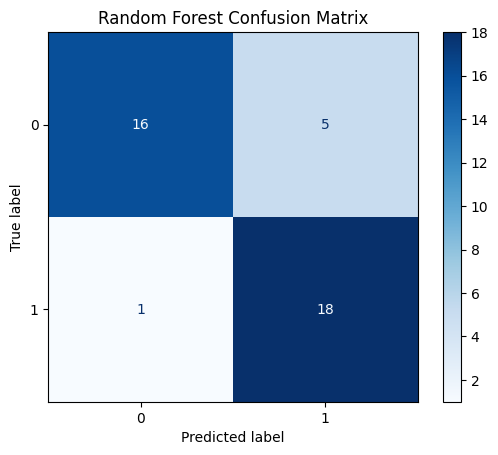

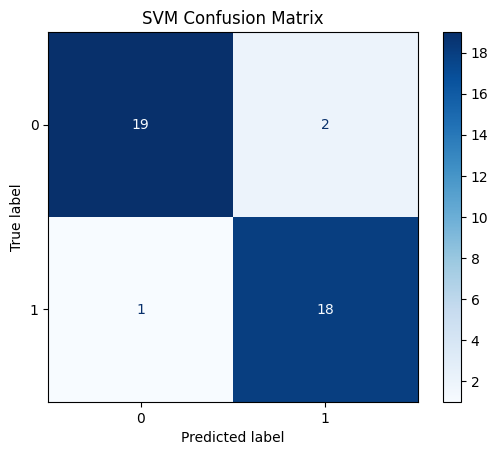

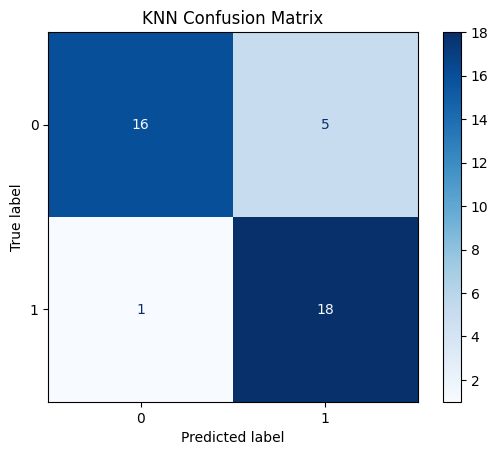

In [24]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")